In [1]:
import numpy as np

#from copy import deepcopy
from tqdm.notebook import tqdm
#import time as t

from Mixers import LazyRandomWalk, Swirl, BalazsFlow, Distribution

#import matplotlib.pyplot as plt

---
#### Global parameters

In [2]:
np.set_printoptions(precision=2)

gridLimit = 1e3

---
#### Run

In [16]:
# === Mixing strategy & related parameters === #
MarkovChain = Swirl

diff = .125
alternating = False

if MarkovChain == Swirl:
    f_n = lambda i: int(2 * i)
    iterParams = (1, gridLimit / 2, 25)
elif MarkovChain == BalazsFlow:
    f_n = lambda i: int(2**(i+1) - 2)
    iterParams = (2, np.log(gridLimit + 2) / np.log(2) - 1, 1)
else:
    f_n = lambda i: int(i)
    iterParams = (2, gridLimit, 50)
    
file_name = ['', 'Alternating'][alternating] + 'Swirl' + ['', 'WithDiffusion'][diff > 0]

In [ ]:
# === Output file === #
file = f'mt_data/{file_name}.csv'
! touch $file

# === Iteration over size of grid === #
for k in tqdm(np.arange(*iterParams), desc='size'):
    n = f_n(k)
        
    # === Markov chain === #
    mc = MarkovChain(int(k), diff=diff)
    
    # === Iteration over all Dirac distributions === #
    for i,j in [(0,0), ((n-1)//2,(n-1)//2)]:
        # === Initial distribution === #
        d = np.zeros([n, n])
        d[i, j] = 1
        di = Distribution(d)

        # === Output list === #
        dInit = int((np.arange(0,.96,.05) > di.distance_from_stationarity(mc)).sum())
        milestone = 1 - (dInit + 1) * .05
        
        data = [n, i, j] + [0] * dInit
        
        # === Simulation === #
        t = 0
        while milestone > 0.2:
            di.update(mc)
            
            if (di.distance_from_stationarity(mc) < milestone):
                data.append(t)
                milestone -= .05
            
            t += 1

        # === Saving the data === #
        output = ','.join(f'{i}' for i in data)
        with open(file, 'a') as f:
            f.write(output)

size:   0%|          | 0/20 [00:00<?, ?it/s]

---
#### SandBox

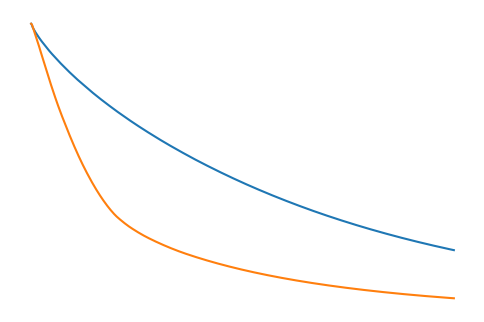

In [6]:
plt.plot(tvd_lrw)
plt.plot(tvd_bf1)

plt.axis('off')
plt.show()

---
---
---